## Load and clean the datasets

In [25]:
# import neccessary libarries

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from math import pi

In [21]:
#load the data
base_dir = Path('/Users/madalinaciolan/dev/explainable_ai')

#load the energy demand data(load)
load_path = base_dir / 'data' / 'Load' / 'load_history.csv'
load_df = pd.read_csv(load_path)

#load the temperature data
temp_path = base_dir / 'data' / 'Load' / 'temperature_history.csv'
temp_df = pd.read_csv(temp_path)

In [22]:
#fix the index for both dataframes
load_df.index = range(1, len(load_df) + 1)
print(load_df.head())

temp_df.index = range(1, len(temp_df) + 1)
print(temp_df.head())

   zone_id  year  month  day      h1      h2      h3      h4      h5      h6  \
1        1  2004      1    1  16,853  16,450  16,517  16,873  17,064  17,727   
2        1  2004      1    2  14,155  14,038  14,019  14,489  14,920  16,072   
3        1  2004      1    3  14,439  14,272  14,109  14,081  14,775  15,491   
4        1  2004      1    4  11,273  10,415   9,943   9,859   9,881  10,248   
5        1  2004      1    5  10,750  10,321  10,107  10,065  10,419  12,101   

   ...     h15     h16     h17     h18     h19     h20     h21     h22  \
1  ...  13,518  13,138  14,130  16,809  18,150  18,235  17,925  16,904   
2  ...  16,127  15,448  15,839  17,727  18,895  18,650  18,443  17,580   
3  ...  13,507  13,414  13,826  15,825  16,996  16,394  15,406  14,278   
4  ...  14,207  13,614  14,162  16,237  17,430  17,218  16,633  15,238   
5  ...  13,845  14,350  15,501  17,307  18,786  19,089  19,192  18,416   

      h23     h24  
1  16,162  14,750  
2  16,467  15,258  
3  13,315  12,

In [23]:
#check the info and missing values for both dataframes
print(load_df.info())
print(load_df.isna().sum())

print(temp_df.info())
print(temp_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 1 to 33000
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   zone_id  33000 non-null  int64 
 1   year     33000 non-null  int64 
 2   month    33000 non-null  int64 
 3   day      33000 non-null  int64 
 4   h1       31740 non-null  object
 5   h2       31740 non-null  object
 6   h3       31740 non-null  object
 7   h4       31740 non-null  object
 8   h5       31740 non-null  object
 9   h6       31740 non-null  object
 10  h7       31720 non-null  object
 11  h8       31720 non-null  object
 12  h9       31720 non-null  object
 13  h10      31720 non-null  object
 14  h11      31720 non-null  object
 15  h12      31720 non-null  object
 16  h13      31720 non-null  object
 17  h14      31720 non-null  object
 18  h15      31720 non-null  object
 19  h16      31720 non-null  object
 20  h17      31720 non-null  object
 21  h18      31720 non-null  object
 22

In [24]:
# ---- Clean the load dataframe ----   
load_df_clean = load_df.copy()
cols = [f"h{i}" for i in range(1, 25)]
for col in cols:
    load_df_clean[col] = load_df_clean[col].str.replace(",", "").astype(float)

print(load_df_clean.dtypes)
print(load_df_clean.isna().sum())

zone_id      int64
year         int64
month        int64
day          int64
h1         float64
h2         float64
h3         float64
h4         float64
h5         float64
h6         float64
h7         float64
h8         float64
h9         float64
h10        float64
h11        float64
h12        float64
h13        float64
h14        float64
h15        float64
h16        float64
h17        float64
h18        float64
h19        float64
h20        float64
h21        float64
h22        float64
h23        float64
h24        float64
dtype: object
zone_id       0
year          0
month         0
day           0
h1         1260
h2         1260
h3         1260
h4         1260
h5         1260
h6         1260
h7         1280
h8         1280
h9         1280
h10        1280
h11        1280
h12        1280
h13        1280
h14        1280
h15        1280
h16        1280
h17        1280
h18        1280
h19        1280
h20        1280
h21        1280
h22        1280
h23        1280
h24        1280
dtype:

## Fill in missing values

In [6]:
# --- Fill NaNs in load_df_clean using interpolation before/after ---
# 1) Horizontal interpolation within each day across h1..h24
#    (fills gaps inside a day's 24 hours using surrounding hours)
load_df_clean[cols] = load_df_clean[cols].interpolate(method='linear', axis=1, limit_direction='both')

# 2) Vertical interpolation across days for each hour h1..h24
#    (fills gaps across days using surrounding days for each hour)
#load_df_clean[cols] = load_df_clean[cols].interpolate(method='linear',  axis=0, limit_direction='both')

# check if all NaNs in the load data frame have been filled
print("\nRemaining NaNs per column after interpolation: ", load_df_clean[cols].isna().sum())


Remaining NaNs per column after interpolation:  h1     1260
h2     1260
h3     1260
h4     1260
h5     1260
h6     1260
h7     1260
h8     1260
h9     1260
h10    1260
h11    1260
h12    1260
h13    1260
h14    1260
h15    1260
h16    1260
h17    1260
h18    1260
h19    1260
h20    1260
h21    1260
h22    1260
h23    1260
h24    1260
dtype: int64


In [7]:
# ---- Clean the temperature dataframe ----  
print(load_df_clean.dtypes) #no need to change types, they are already integers and floats
print(temp_df.isna().sum()) #NaNs only in temperature colums h7 -> h24
temp_df_clean = temp_df.copy()

zone_id      int64
year         int64
month        int64
day          int64
h1         float64
h2         float64
h3         float64
h4         float64
h5         float64
h6         float64
h7         float64
h8         float64
h9         float64
h10        float64
h11        float64
h12        float64
h13        float64
h14        float64
h15        float64
h16        float64
h17        float64
h18        float64
h19        float64
h20        float64
h21        float64
h22        float64
h23        float64
h24        float64
dtype: object
station_id     0
year           0
month          0
day            0
h1             0
h2             0
h3             0
h4             0
h5             0
h6             0
h7            11
h8            11
h9            11
h10           11
h11           11
h12           11
h13           11
h14           11
h15           11
h16           11
h17           11
h18           11
h19           11
h20           11
h21           11
h22           11
h23         

In [8]:
# --- Fill NaNs in load_df_clean using interpolation before/after ---
#  Vertical interpolation across days for each hour h7..h24
#    (fills gaps across days using surrounding days for each hour)
cols_temp = [f"h{i}" for i in range(7, 25)]
for col in cols_temp:
    temp_df_clean[col] = temp_df_clean[col].interpolate(method='linear', axis=0, limit_direction='both')    

In [9]:
#check if all NaNs in the temperature data frame have been filled
print("\nRemaining NaNs per column after interpolation: ", temp_df_clean.isna().sum()) 

print(load_df_clean.head())


Remaining NaNs per column after interpolation:  station_id    0
year          0
month         0
day           0
h1            0
h2            0
h3            0
h4            0
h5            0
h6            0
h7            0
h8            0
h9            0
h10           0
h11           0
h12           0
h13           0
h14           0
h15           0
h16           0
h17           0
h18           0
h19           0
h20           0
h21           0
h22           0
h23           0
h24           0
dtype: int64
   zone_id  year  month  day       h1       h2       h3       h4       h5  \
1        1  2004      1    1  16853.0  16450.0  16517.0  16873.0  17064.0   
2        1  2004      1    2  14155.0  14038.0  14019.0  14489.0  14920.0   
3        1  2004      1    3  14439.0  14272.0  14109.0  14081.0  14775.0   
4        1  2004      1    4  11273.0  10415.0   9943.0   9859.0   9881.0   
5        1  2004      1    5  10750.0  10321.0  10107.0  10065.0  10419.0   

        h6  ...      h15   

## Reshape both data frames from wide to long format

In [11]:
# ----Reshaping the load dataframe from wide to long format ----

# Melt the dataframe to have a long format with columns: year, month, day, hour, load
hours_cols = [f"h{i}" for i in range(1, 25)]
load_long = load_df_clean.melt(
    id_vars=["zone_id", "year", "month", "day"],
    value_vars=hours_cols,
    var_name="hour",
    value_name="load",
)

# Convert hour column to numeric hour
load_long['hour'] = load_long['hour'].str.extract('h(\d+)').astype(int)

# Create a datetime column
load_long['date_time'] = pd.to_datetime(load_long[['year', 'month', 'day']]) + pd.to_timedelta(load_long['hour'] - 1, unit='h')

#Keep only relevant columns and sort by date
load_long = load_long[['zone_id','date_time', 'load']].sort_values(['zone_id', 'date_time']).reset_index(drop=True)
print(load_long.head())



   zone_id           date_time     load
0        1 2004-01-01 00:00:00  16853.0
1        1 2004-01-01 01:00:00  16450.0
2        1 2004-01-01 02:00:00  16517.0
3        1 2004-01-01 03:00:00  16873.0
4        1 2004-01-01 04:00:00  17064.0


In [13]:
print(temp_df_clean.head())

# ----Reshaping the temperature dataframe from wide to long format ----

# Melt the dataframe to have a long format with columns: year, month, day, hour, temperature
temp_hour_cols = [f"h{i}" for i in range(1, 25)]
temp_long = temp_df_clean.melt(
    id_vars=["station_id", "year", "month", "day"],
    value_vars=temp_hour_cols,
    var_name="hour",
    value_name="temperature",
)

# Convert hour column to numeric hour
temp_long['hour'] = temp_long['hour'].str.extract('h(\d+)').astype(int)

# Create a datetime column
temp_long['date_time'] = pd.to_datetime(temp_long[['year', 'month', 'day']]) + pd.to_timedelta(temp_long['hour'] - 1, unit='h')

#Keep only relevant columns and sort by date
#temp_long = temp_long[['station_id','date_time', 'temperature']].sort_values(by='date_time').reset_index(drop=True)
#print(temp_long.head())

# Pivot so each station is one column
temp_wide = temp_long.pivot(index='date_time', columns='station_id', values='temperature')
temp_wide.columns = [f"station_{col}" for col in temp_wide.columns]

   station_id  year  month  day  h1  h2  h3  h4  h5  h6  ...   h15   h16  \
1           1  2004      1    1  46  46  45  41  39  35  ...  55.0  55.0   
2           1  2004      1    2  43  44  46  46  47  47  ...  54.0  56.0   
3           1  2004      1    3  45  46  46  44  43  46  ...  69.0  68.0   
4           1  2004      1    4  63  62  62  62  60  60  ...  71.0  72.0   
5           1  2004      1    5  64  63  65  64  64  64  ...  66.0  66.0   

    h17   h18   h19   h20   h21   h22   h23   h24  
1  52.0  46.0  40.0  40.0  39.0  38.0  40.0  41.0  
2  57.0  53.0  50.0  47.0  46.0  45.0  45.0  45.0  
3  68.0  65.0  64.0  63.0  62.0  63.0  63.0  62.0  
4  71.0  68.0  67.0  67.0  65.0  64.0  65.0  64.0  
5  66.0  66.0  63.0  54.0  52.0  49.0  47.0  47.0  

[5 rows x 28 columns]


## Merge the dataframes 
### Two options: attach all of the stations' temperature to each load record or infer a map of correlations.
### Have chosen the first option as it is reccommended for modeling. I have merged the load data with all stations' tempratures so each load observation has temp_station_1, ... , temp_station_11 as features. This avoids teh need to have a  zone <-> station map.

In [15]:
# --- Merge: attach all stations' temperatures to each load record ---
merged_all = load_long.merge(temp_wide.reset_index(), on='date_time', how='left')
print(merged_all)

        zone_id           date_time     load  station_1  station_2  station_3  \
0             1 2004-01-01 00:00:00  16853.0       46.0       38.0       44.0   
1             1 2004-01-01 01:00:00  16450.0       46.0       36.0       42.0   
2             1 2004-01-01 02:00:00  16517.0       45.0       35.0       40.0   
3             1 2004-01-01 03:00:00  16873.0       41.0       30.0       36.0   
4             1 2004-01-01 04:00:00  17064.0       39.0       30.0       34.0   
...         ...                 ...      ...        ...        ...        ...   
791995       20 2008-07-07 19:00:00      NaN        NaN        NaN        NaN   
791996       20 2008-07-07 20:00:00      NaN        NaN        NaN        NaN   
791997       20 2008-07-07 21:00:00      NaN        NaN        NaN        NaN   
791998       20 2008-07-07 22:00:00      NaN        NaN        NaN        NaN   
791999       20 2008-07-07 23:00:00      NaN        NaN        NaN        NaN   

        station_4  station_

In [ ]:
merged_all.isnull().sum() #check for missing values after the merge

zone_id           0
date_time         0
load          30240
station_1      3360
station_2      3360
station_3      3360
station_4      3360
station_5      3360
station_6      3360
station_7      3360
station_8      3360
station_9      3360
station_10     3360
station_11     3360
dtype: int64

In [ ]:
merged_all_cleaned = merged_all.dropna().reset_index(drop=True) #drop rows with any NaNs and reset index
print(merged_all_cleaned)

        zone_id           date_time     load  station_1  station_2  station_3  \
0             1 2004-01-01 00:00:00  16853.0       46.0       38.0       44.0   
1             1 2004-01-01 01:00:00  16450.0       46.0       36.0       42.0   
2             1 2004-01-01 02:00:00  16517.0       45.0       35.0       40.0   
3             1 2004-01-01 03:00:00  16873.0       41.0       30.0       36.0   
4             1 2004-01-01 04:00:00  17064.0       39.0       30.0       34.0   
...         ...                 ...      ...        ...        ...        ...   
761755       20 2008-06-30 19:00:00  74728.0       67.0       54.0       63.5   
761756       20 2008-06-30 20:00:00  74728.0       65.5       51.0       61.5   
761757       20 2008-06-30 21:00:00  74728.0       64.5       48.5       58.0   
761758       20 2008-06-30 22:00:00  74728.0       61.0       48.5       59.0   
761759       20 2008-06-30 23:00:00  74728.0       60.0       48.5       59.0   

        station_4  station_

In [19]:
merged_all_cleaned.isnull().sum()

zone_id       0
date_time     0
load          0
station_1     0
station_2     0
station_3     0
station_4     0
station_5     0
station_6     0
station_7     0
station_8     0
station_9     0
station_10    0
station_11    0
dtype: int64

## Build time features:
####    •	cyclical encodings (hour/dow/doy)
####	•	weekend + US holiday flags (holiday, day-before, day-after)
####	•	approximate sunrise/sunset + daylight flags (no lat/lon as the geografical zone is unknown) 
####	•	Heating Degree Days(HDD) / Cooling Degree Days (CDD) from all temp_station_* columns (auto-detects temps) with a threshold of 18 °C

In [43]:
holidays = pd.read_csv(base_dir / 'data' / 'Load' / 'Holiday_List.csv')
print(type(holidays))
print(holidays.head())

<class 'pandas.core.frame.DataFrame'>
                            Unnamed: 0                 2004  \
0                       New Year's Day  Thursday, January 1   
1  Birthday of Martin Luther King, Jr.   Monday, January 19   
2                Washington's Birthday  Monday, February 16   
3                         Memorial Day       Monday, May 31   
4                     Independence Day       Monday, July 5   

                        2005                 2006                 2007  \
0  Friday, December 31, 2004    Monday, January 2    Monday, January 1   
1         Monday, January 17   Monday, January 16   Monday, January 15   
2        Monday, February 21  Monday, February 20  Monday, February 19   
3             Monday, May 30       Monday, May 29       Monday, May 28   
4             Monday, July 4      Tuesday, July 4    Wednesday, July 4   

                  2008  
0   Tuesday, January 1  
1   Monday, January 21  
2  Monday, February 18  
3       Monday, May 26  
4       Frida

In [ ]:
# Helper: convert the wide-format Holiday_List DataFrame into a tidy list of dates
def _normalize_holiday_matrix(df: pd.DataFrame) -> pd.DataFrame:
    """
    Convert wide holiday matrix (holiday names as rows, years as columns)
    into a tidy DataFrame with a single 'date' column.
    """
    # Melt into long format: one row per (holiday, year, raw string)
    long = df.reset_index().melt(
        id_vars=[df.reset_index().columns[0]],
        var_name="year",
        value_name="raw"
    ).rename(columns={df.reset_index().columns[0]: "holiday"})

    long["raw"] = long["raw"].astype(str).str.strip()
    long = long[~long["raw"].isin(["", "nan", "NaN"])]

    def _parse_row(row):
        txt = row["raw"].strip().strip('"').strip("'")
        yr  = int(row["year"])
        # clean spaces/commas
        txt = re.sub(r"\s+,", ",", txt)
        txt = re.sub(r"\s{2,}", " ", txt)
        # if year already present in the string, parse directly
        if re.search(r"\b\d{4}\b", txt):
            return pd.to_datetime(txt, errors="coerce")
        else:
            return pd.to_datetime(f"{txt}, {yr}", errors="coerce")

    long["date"] = long.apply(_parse_row, axis=1)
    dates = long["date"].dropna().dt.normalize().drop_duplicates()
    return pd.DataFrame({"date": dates.sort_values()})


def make_features(
    df: pd.DataFrame,
    holidays,                     # can be a path or a wide-format DataFrame
    *,
    date_col: str = "date_time",
    temp_prefix: str = "temp_station_",
    base_c: float = 18.0,       # base temperature for HDD/CDD calculations (°C)
    doy_period: int = 366,      # leap-year friendly
    sr_mean: float = 6.5,       # 06:30 average sunrise time
    sr_amp: float = 1.5,        # +/- 1.5 hours amplitude (earliest sunrise ~05:00, latest ~08:00)      
    ss_mean: float = 18.5,      # 18:30 average sunset time
    ss_amp: float = 2.0         # +/- 2.0 hours amplitude (earliest sunset ~17:30, latest ~20:30)
) -> pd.DataFrame:
    """
    Adds:
      • cyclical encodings (hour/dow/doy)
      • weekend + holiday flags
      • approximate sunrise/sunset + daylight
      • HDD/CDD from all temp_station_* columns (°C)

    Parameters:
    - df: Input dataframe with a datetime column and temperature columns
    - holidays: DataFrame containing US holidays with a 'date' column
    - date_col: Name of the datetime column in df
    - temp_prefix: Prefix for temperature columns to consider for HDD/CDD calculations
    - base_c: Base temperature in Celsius for HDD/CDD calculations
    - doy_period: Period for cyclical encoding of day of year (366 to include leap year)
    - sr_mean, sr_amp: Mean and amplitude for sunrise time approximation
    - ss_mean, ss_amp: Mean and amplitude for sunset time approximation
    """
    out = df.copy()

    # ---- timestamp
    out[date_col] = pd.to_datetime(out[date_col], errors="coerce")
    if out[date_col].isna().any():
        raise ValueError(f"{date_col} contains NaT after parsing.")
    dt  = out[date_col]

    out["hour"] = dt.dt.hour
    out["dow"]  = dt.dt.dayofweek
    out["is_weekend"] = (out["dow"] >= 5).astype(int)
    doy = dt.dt.dayofyear.astype(int)

    # ---- cyclical encodings
    out["hour_sin"] = np.sin(2 * pi * out["hour"] / 24)
    out["hour_cos"] = np.cos(2 * pi * out["hour"] / 24)
    out["dow_sin"]  = np.sin(2 * pi * out["dow"] / 7)
    out["dow_cos"]  = np.cos(2 * pi * out["dow"] / 7)
    out["doy_sin"]  = np.sin(2 * pi * doy / doy_period)
    out["doy_cos"]  = np.cos(2 * pi * doy / doy_period)

    # ---- holidays
    if isinstance(holidays, (str, os.PathLike)):
        holidays_df = pd.read_csv(holidays)
    elif isinstance(holidays, pd.DataFrame):
        holidays_df = holidays.copy()
    else:
        raise ValueError("holidays must be a CSV path or a DataFrame")

    # normalize the wide holiday matrix into a single 'date' column
    holidays_norm = _normalize_holiday_matrix(holidays_df)
    hol_days = set(holidays_norm["date"].unique())
    cal_day  = dt.dt.normalize()

    out["is_holiday"]            = cal_day.isin(hol_days).astype(int)
    out["is_day_before_holiday"] = cal_day.isin({d - pd.Timedelta(days=1) for d in hol_days}).astype(int)
    out["is_day_after_holiday"]  = cal_day.isin({d + pd.Timedelta(days=1) for d in hol_days}).astype(int)

    # ---- sunrise/sunset-like approximation
    sunrise_hour = sr_mean - sr_amp * np.cos(2 * pi * doy / doy_period)
    sunset_hour  = ss_mean + ss_amp * np.cos(2 * pi * doy / doy_period)

    out["sunrise_hour_approx"]   = sunrise_hour
    out["sunset_hour_approx"]    = sunset_hour
    out["daylight_hours_approx"] = sunset_hour - sunrise_hour
    out["is_daylight_approx"]    = ((out["hour"] >= sunrise_hour.astype(int)) &
                                    (out["hour"] <  sunset_hour.astype(int))).astype(int)
    out["daylight_proxy"] = np.sin(2 * pi * doy / doy_period)

    # ---- HDD/CDD (temps in °C)
    temp_cols = [c for c in out.columns if c.startswith(temp_prefix)]
    if not temp_cols:
        temp_cols = [c for c in out.columns if re.search(r"temp", c, re.IGNORECASE)]
    if temp_cols:
        out["temp_mean"] = out[temp_cols].mean(axis=1)
        out["HDD"] = (base_c - out["temp_mean"]).clip(lower=0)
        out["CDD"] = (out["temp_mean"] - base_c).clip(lower=0)

    return out

features_df = make_features(merged_all_cleaned, holidays, temp_prefix='station_')
print(features_df.head()) 

   zone_id           date_time     load  station_1  station_2  station_3  \
0        1 2004-01-01 00:00:00  16853.0       46.0       38.0       44.0   
1        1 2004-01-01 01:00:00  16450.0       46.0       36.0       42.0   
2        1 2004-01-01 02:00:00  16517.0       45.0       35.0       40.0   
3        1 2004-01-01 03:00:00  16873.0       41.0       30.0       36.0   
4        1 2004-01-01 04:00:00  17064.0       39.0       30.0       34.0   

   station_4  station_5  station_6  station_7  ...  is_day_before_holiday  \
0       45.0       42.0       44.0       45.0  ...                      0   
1       43.0       42.0       43.0       44.0  ...                      0   
2       41.0       40.0       42.0       41.0  ...                      0   
3       37.0       39.0       38.0       40.0  ...                      0   
4       33.0       40.0       38.0       35.0  ...                      0   

   is_day_after_holiday  sunrise_hour_approx  sunset_hour_approx  \
0           

## Plot the obtained data frame with time features (features_df) to visualize trends, seasonality and holiday effects

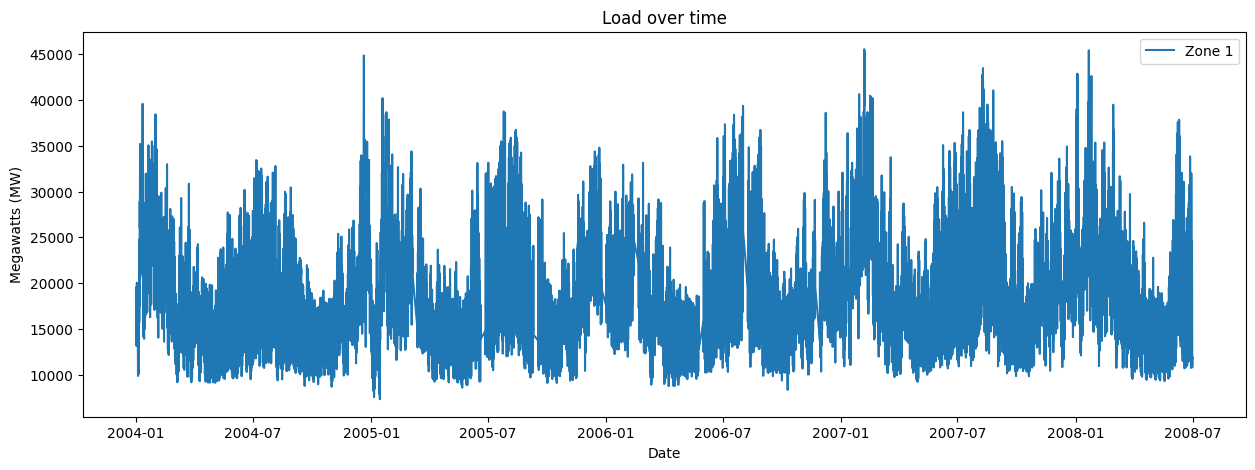

In [ ]:
# Look at loaad demand for a specific zone over the full timeline
feat = features_df.copy()
zone = feat['zone_id'].unique()[0]  # pick first zone
df_zone = feat[feat['zone_id'] == zone].set_index('date_time')

plt.figure(figsize=(15,5))
plt.plot(df_zone['load'], label=f"Zone {zone}")
plt.title("Load over time")
plt.ylabel("Megawatts (MW)")
plt.xlabel("Date")
plt.legend()
plt.show()

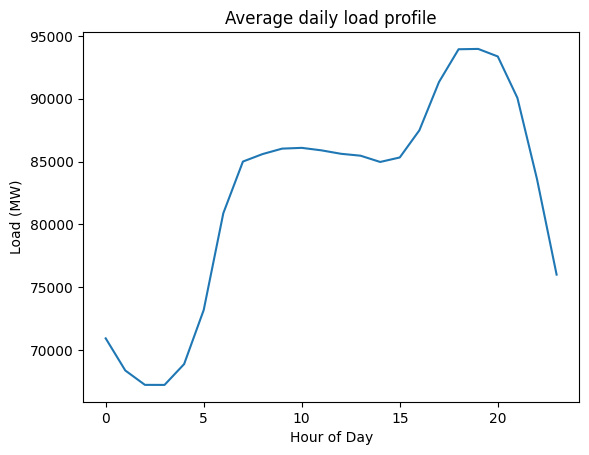

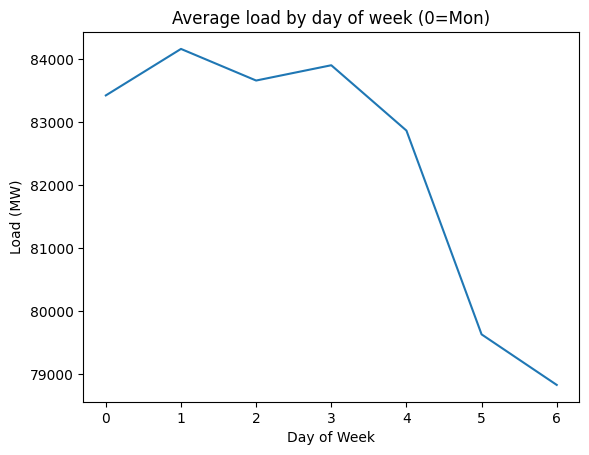

In [ ]:
# Average load by hour and day of week
# Hourly pattern
sns.lineplot(x="Hour", y="Load", data=feat, estimator="mean", errorbar=None)
plt.title("Average daily load profile")
plt.show()

# Weekly pattern
sns.lineplot(x="Day of the Week", y="Load", data=feat, estimator="mean", errorbar=None)
plt.title("Average load by day of week (0=Mon)")
plt.show()